<a href="https://colab.research.google.com/github/dwi11harsh/Stock-Prediction-Model/blob/main/stock_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.


In [8]:
# Import required libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [20]:
# Get the stock quuite
df = web.DataReader( 'AAPL',data_source='stooq', start='2012-01-01', end='2024-01-01')

# Show the data
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,193.9000,194.4000,191.7250,192.5300,4.267215e+07
2023-12-28,194.1400,194.6600,193.1700,193.5800,3.404990e+07
2023-12-27,192.4900,193.5000,191.0900,193.1500,4.808768e+07
2023-12-26,193.6100,193.8900,192.8300,193.0500,2.891931e+07
2023-12-22,195.1800,195.4100,192.9700,193.6000,3.714957e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [21]:
# Get the number of columns in the data set
df.shape

(3018, 5)

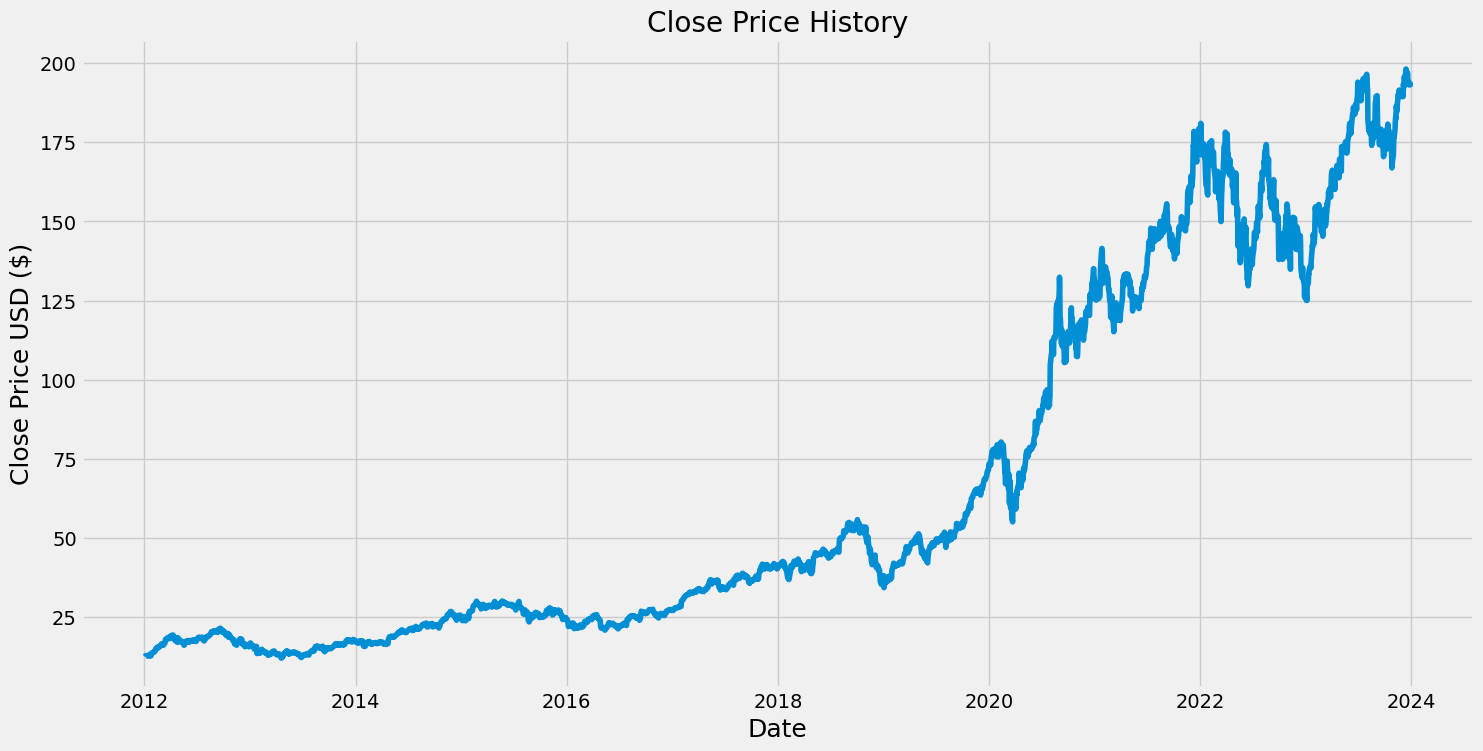

In [57]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
# Create a new dataframe with only the close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of the rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2415

In [40]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.97000739],
       [0.97565116],
       [0.9733399 ],
       ...,
       [0.00356364],
       [0.00280791],
       [0.00244886]])

In [41]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

# Split the data into x_train data and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.97000739, 0.97565116, 0.9733399 , 0.9728024 , 0.97575866,
       0.98156368, 0.98236993, 0.99371123, 0.98806745, 0.99709749,
       1.        , 0.99919375, 0.98172493, 0.97350115, 0.98709995,
       0.97935992, 0.96887863, 0.97479115, 0.95334482, 0.96307361,
       0.95613983, 0.95302232, 0.95855859, 0.95527983, 0.95624733,
       0.96344986, 0.9598486 , 0.96420236, 0.95474233, 0.95484983,
       0.94571229, 0.94264853, 0.92845848, 0.93705851, 0.91561218,
       0.91819219, 0.91244092, 0.89851961, 0.88465206, 0.88959708,
       0.870247  , 0.85304694, 0.85046693, 0.83934064, 0.83219186,
       0.85482069, 0.86739824, 0.86503323, 0.86438823, 0.87825578,
       0.88029829, 0.88733957, 0.89577835, 0.8964771 , 0.90647464,
       0.90158337, 0.89400459, 0.89722961, 0.88916708, 0.87529952])]
[0.8685807473213584]

[array([0.97000739, 0.97565116, 0.9733399 , 0.9728024 , 0.97575866,
       0.98156368, 0.98236993, 0.99371123, 0.98806745, 0.99709749,
       1.        , 0.99919375, 0.981

In [42]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2355, 60, 1)

In [44]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
# Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [46]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2355/2355 [==============================] - 79s 32ms/step - loss: 0.0016


In [52]:
# Create the testing data set

# Create a new array containing scaled values from index 2355 to 2958
test_data = scaled_data[training_data_len - 60:, :]

# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [53]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [54]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 0s 16ms/step


In [65]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.5746990004830024

<ipython-input-66-ee519cfb8028>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


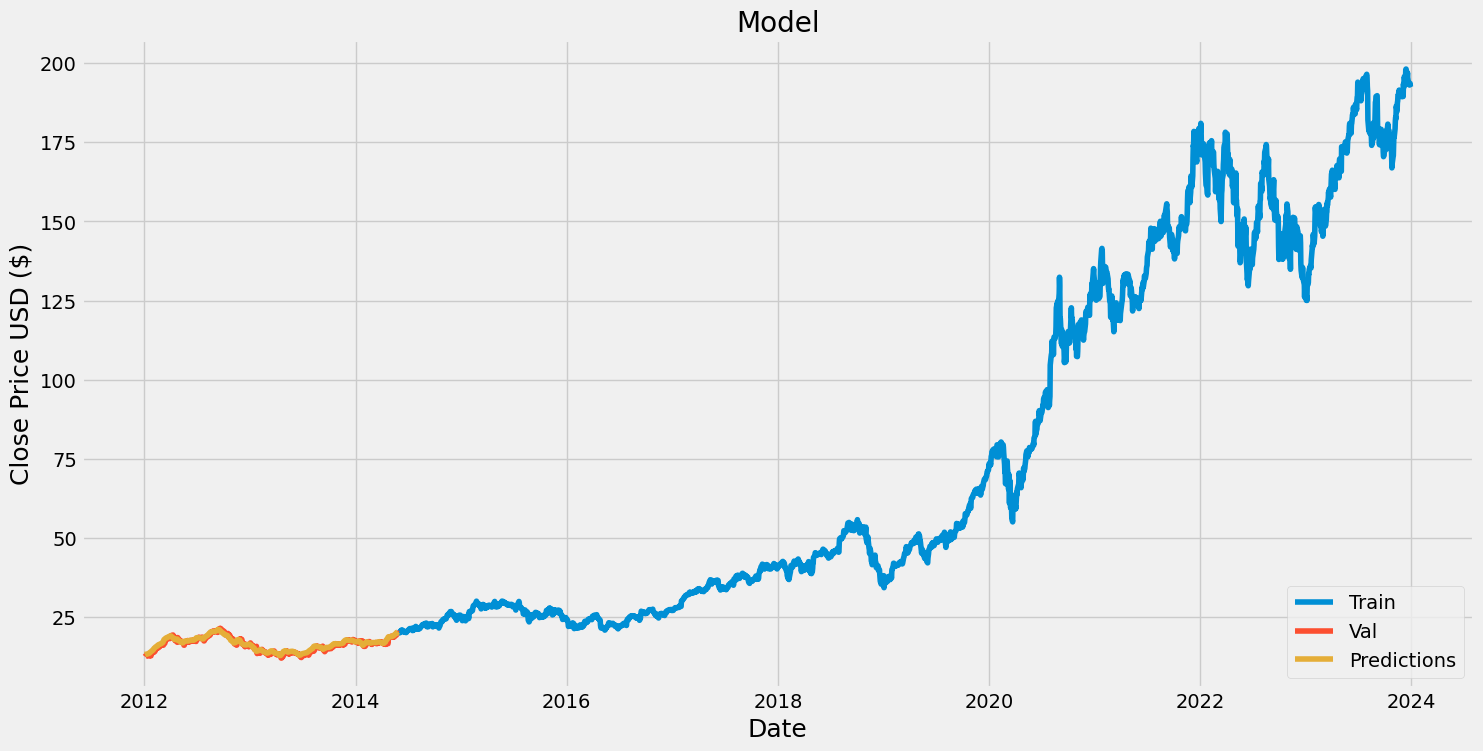

In [66]:
# Plot the data
train = data [:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2014-05-28,19.8753,20.341391
2014-05-27,19.9272,20.251877
2014-05-23,19.5594,20.166052
2014-05-22,19.3420,20.056238
2014-05-21,19.3121,19.923172
...,...,...
2012-01-09,12.8408,13.294929
2012-01-06,12.8608,13.277612
2012-01-05,12.7272,13.266929


In [63]:
# Get the apple quote
apple_quote = web.DataReader( 'AAPL',data_source='stooq', start='2012-01-01', end='2024-01-01')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the datafram to an array
last_60_days = new_df[-60:].values

# Scale the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test= []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert the x_test data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_price =  model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 37ms/step
[[13.1671295]]


In [64]:
# Get the apple quote
apple_quote2 = web.DataReader( 'AAPL',data_source='stooq', start='2024-01-02', end='2024-01-02')
print(apple_quote2['Close'])

Date
2024-01-02    185.64
Name: Close, dtype: float64
